In [1]:
import matplotlib.pyplot as plt

In [2]:
from scipy.signal import spectrogram, welch

In [3]:
import numpy as np

In [4]:
import pickle, glob

In [5]:
import sys,os

In [6]:
from scipy.fftpack import fft

In [7]:
os.getcwd()

'C:\\Users\\HP\\Desktop\\buffer_bci-master\\tutorial\\BCI-project-master'

In [8]:
try:     pydir=os.path.dirname(__file__)
except:  pydir=os.getcwd()

In [9]:
#C:\Users\HP\Desktop\buffer_bci-master\tutorial\BCI-project-master
Path_FieldTrip = "../../dataAcq/buffer/python"
sys.path.append( Path_FieldTrip)

import FieldTrip

In [10]:
Path_Preproc = "../../python/signalproc"
sys.path.append(Path_Preproc)


import preproc

In [11]:
ch = '''  1) Matched : FP1	 ->	 FP1
  2) Matched : FPz	 ->	 FPz
  3) Matched : FP2	 ->	 FP2
  4) Matched : AF7	 ->	 AF7
  5) Matched : AFz	 ->	 AFz
  6) Matched : AF8	 ->	 AF8
  7) Matched : F3	 ->	 F3
  8) Matched : Fz	 ->	 Fz
  9) Matched : F4	 ->	 F4
 10) Matched : FC5	 ->	 FC5
 11) Matched : FC1	 ->	 FC1
 12) Matched : FC2	 ->	 FC2
 13) Matched : FC6	 ->	 FC6
 14) Matched : T9	 ->	 T9
 15) Matched : C3	 ->	 C3
 16) Matched : Cz	 ->	 Cz
 17) Matched : C4	 ->	 C4
 18) Matched : T10	 ->	 T10
 19) Matched : CP1	 ->	 CP1
 20) Matched : CP2	 ->	 CP2
 21) Matched : P3	 ->	 P3
 22) Matched : Pz	 ->	 Pz
 23) Matched : P4	 ->	 P4
 24) Matched : TP9	 ->	 TP9
 25) Matched : P7	 ->	 P7
 26) Matched : POz	 ->	 POz
 27) Matched : O1	 ->	 O1
 28) Matched : Oz	 ->	 Oz
 29) Matched : O2	 ->	 O2
 30) Matched : TP10	 ->	 TP10'''

In [12]:
ch_32 = {}
for i in ch.split('\n'):
    #print(i.split(')')[0].replace(' ',''))
    #print(i.split('->')[-1].replace('	 ',''))
    ch_32[str(i.split(')')[0].replace(' ',''))] = str(i.split('->')[-1].replace('	 ',''))
ch_32['1']

'FP1'

In [13]:
ch_32_r = {}
for i in ch.split('\n'):
    #print(i.split(')')[0].replace(' ',''))
    #print(i.split('->')[-1].replace('	 ',''))
    ch_32_r[str(i.split('->')[-1].replace('	 ',''))] = str(i.split(')')[0].replace(' ',''))

Processin the data form the file 4 up to 15

In [14]:
 # 0 - bad, 1 - good
    
values_hands = {'0':'bad', '1':'good'}

In [28]:
exp = []
exp_name = []
for i in range(1,15):
    file = './error_potentials/training_data_ErrPs-'
    if i == 4: continue
    print(i, file+str(i)+'.pk')
    f = open(file+str(i)+'.pk', 'rb')
    exp_name.append(file+str(i))
    exp.append(pickle.load(f))

1 ./error_potentials/training_data_ErrPs-1.pk
2 ./error_potentials/training_data_ErrPs-2.pk
3 ./error_potentials/training_data_ErrPs-3.pk
5 ./error_potentials/training_data_ErrPs-5.pk
6 ./error_potentials/training_data_ErrPs-6.pk
7 ./error_potentials/training_data_ErrPs-7.pk
8 ./error_potentials/training_data_ErrPs-8.pk
9 ./error_potentials/training_data_ErrPs-9.pk
10 ./error_potentials/training_data_ErrPs-10.pk
11 ./error_potentials/training_data_ErrPs-11.pk
12 ./error_potentials/training_data_ErrPs-12.pk
13 ./error_potentials/training_data_ErrPs-13.pk
14 ./error_potentials/training_data_ErrPs-14.pk


In [26]:
exp[2]['data'][1].shape

(500, 37)

In [37]:
bad = []
good = []



#Counters

bad_count = 0
good_count = 0
both = 0
none = 0


for n_exp in range(len(exp)):
    print(' ***********   Experiment  '+exp_name[n_exp]+'   *********** ')
    data           =   np.array(exp[n_exp]['data'])   #data support variable
    data           =   np.transpose(data)
    # Take only 1s of reecording
    data = data[:,0:250,:]
    print(data.shape)
    # 1: detrend
    data        = preproc.detrend(data)
    # 2: bad-channel removal
    goodch = np.arange(31)
    print(goodch)
    data         = data[goodch,:,:]
    # 3: apply spatial filter
    spatialfilter='car'
    data         = preproc.spatialfilter(data,type=spatialfilter)
    print(data.shape)
    # 4 & 5: spectral filter
    freqbands    = [8, 10, 28, 30]
    data         = preproc.fftfilter(data, 1, freqbands, exp[n_exp]['hdr'].fSample)
    
    print(data.shape)
    
    # 6 : bad-trial removal
    goodtr, badtr = preproc.outlierdetection(data,dim=2)
    print(goodtr)
    data = data[:,:,goodtr]
    
    
    print(data.shape)
    
    n_events = goodtr
    for i, event in enumerate(n_events):
        
        print(exp[n_exp]['events'][event].value[0])
        
        if exp[n_exp]['events'][event].value[0] == '0':
            print('bad')
            bad_count = bad_count + 1
            bad.append(data[:,:,i])
        
        
        if exp[n_exp]['events'][event].value[0] == '1':
            print('good')
            good_count = good_count + 1
            good.append(data[:,:,i]) 
        
    print('good counter',good_count)
    print('bad counter',bad_count)
    print('-'*80)
        
bad_errp    =   np.array(bad)
good_errp   =   np.array(good)


 ***********   Experiment  ./error_potentials/training_data_ErrPs-1   *********** 
(37, 250, 12)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30]
(31, 250, 12)
(31, 250, 12)
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
(31, 250, 12)
0
bad
0
bad
0
bad
0
bad
0
bad
0
bad
0
bad
1
good
0
bad
0
bad
0
bad
0
bad
good counter 1
bad counter 11
--------------------------------------------------------------------------------
 ***********   Experiment  ./error_potentials/training_data_ErrPs-2   *********** 
(37, 250, 12)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30]
(31, 250, 12)
(31, 250, 12)
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
(31, 250, 12)
0
bad
1
good
0
bad
0
bad
0
bad
0
bad
0
bad
0
bad
0
bad
1
good
0
bad
0
bad
good counter 3
bad counter 21
--------------------------------------------------------------------------------
 ***********   Experiment  ./error_potentials/training_data_ErrPs-3   *********** 


In [39]:
print('bad',bad_errp.shape)
print('good',good_errp.shape)


bad (130, 31, 250)
good (23, 31, 250)


## Time plot

In [40]:
# computing grand averages
good_avg = np.mean(good_errp, axis=0)
bad_avg = np.mean(bad_errp, axis=0)

In [41]:
print(good_avg.shape)
print(bad_avg.shape)

(31, 250)
(31, 250)


0


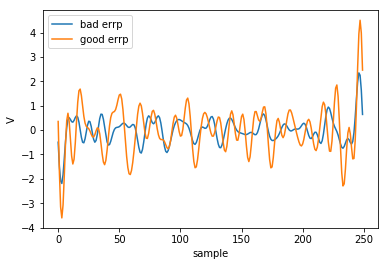

1


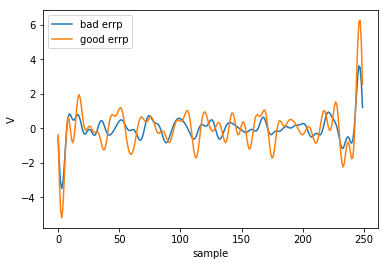

2


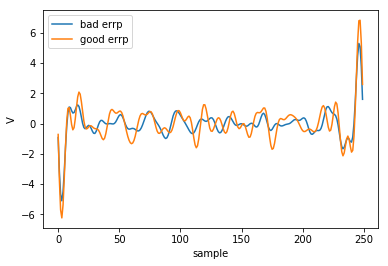

3


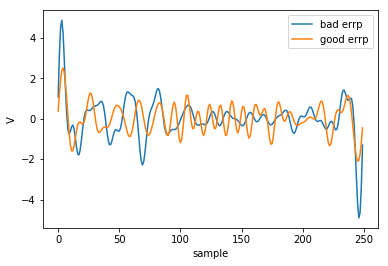

4


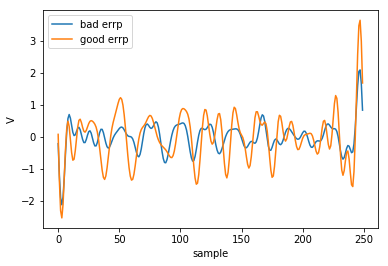

5


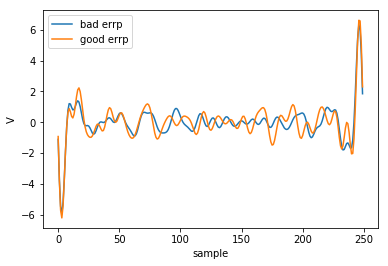

6


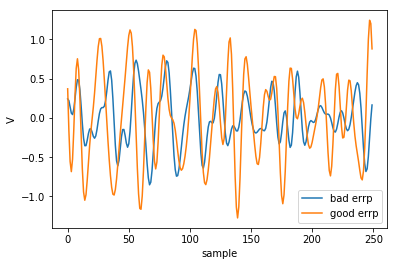

7


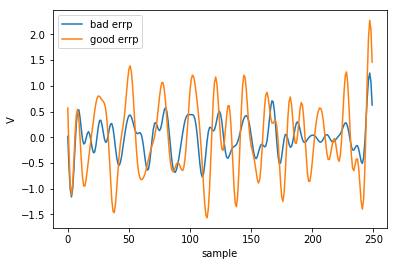

8


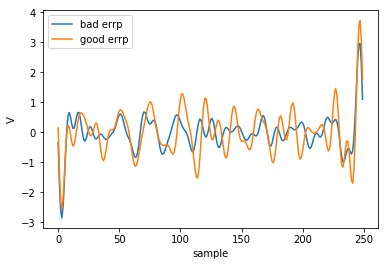

9


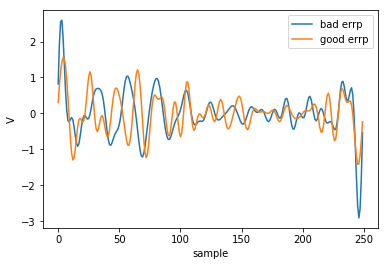

10


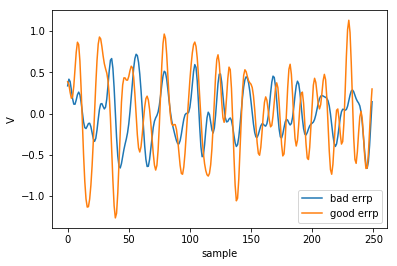

11


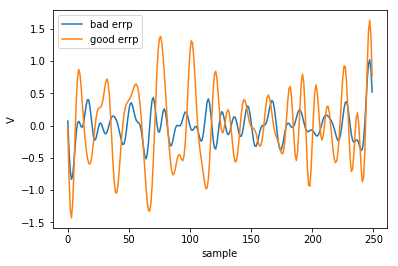

12


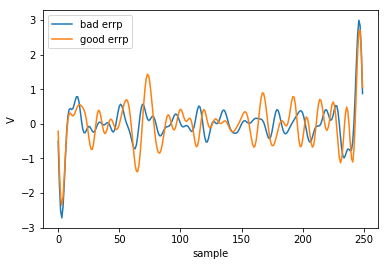

13


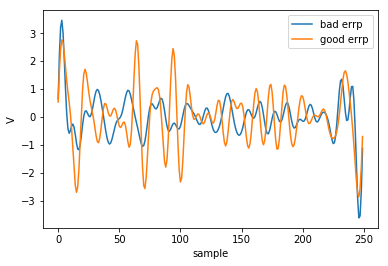

14


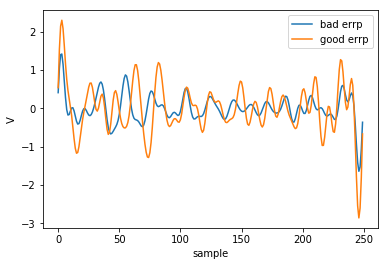

15


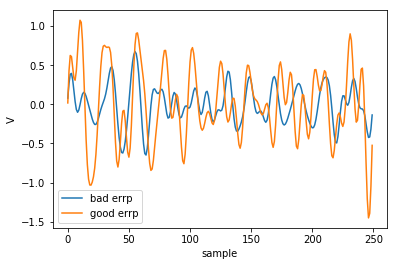

16


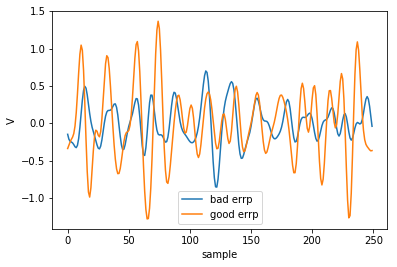

17


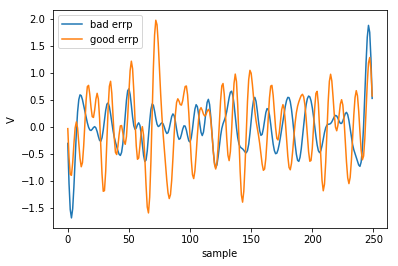

18


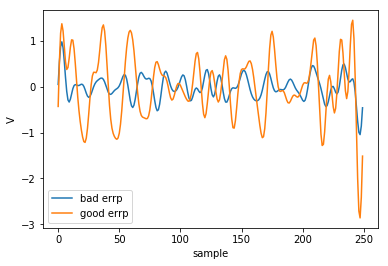

19


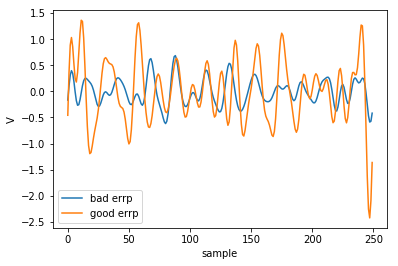

20


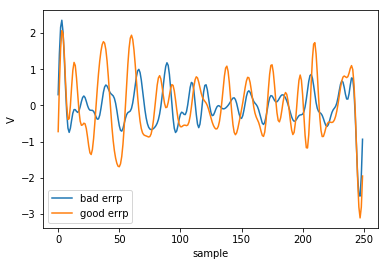

21


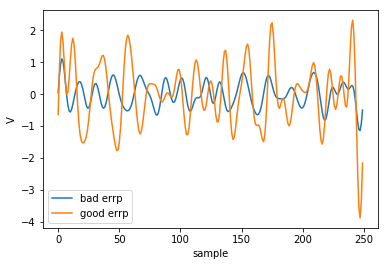

22


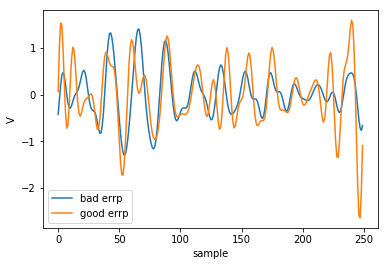

23


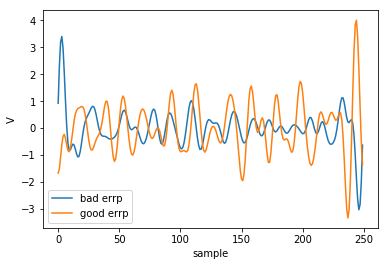

24


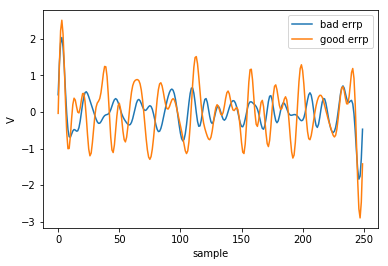

25


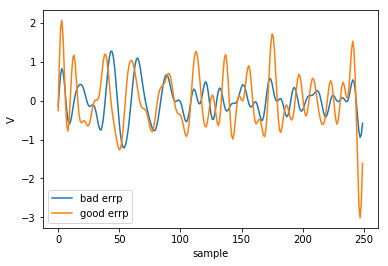

26


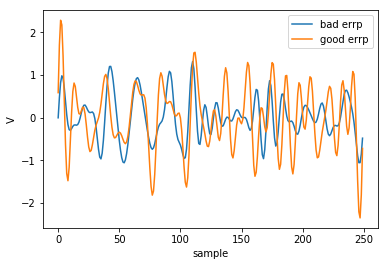

27


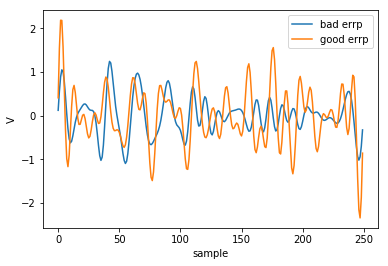

28


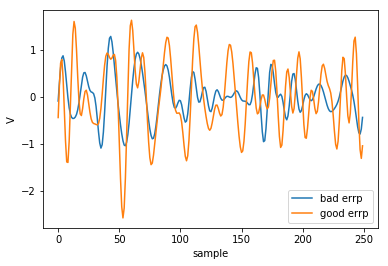

29


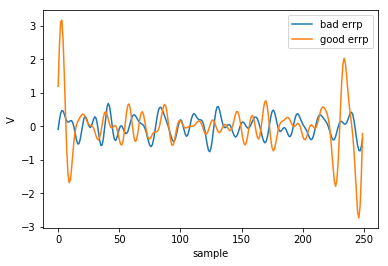

30


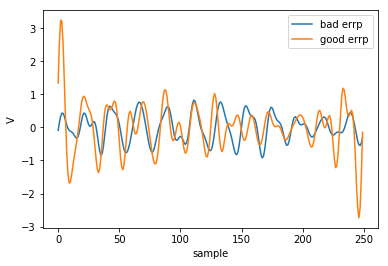

In [42]:
# bad (blue) vs good (orange) plots 

for ch in range(good_avg.shape[0]):
    print(ch)
    plt.plot(bad_avg[ch,:], label='bad errp')
    plt.plot(good_avg[ch,:], label='good errp')
    plt.xlabel('sample')
    plt.ylabel('eeg')
    plt.legend()
    plt.show()

## Frequency plot

In [43]:
from scipy.signal import welch

In [44]:
fs = 250
freqs = np.arange(7,31)

In [45]:
f, bad_psd = welch(bad_errp,
            fs= fs  ,           # sample rate
            window='hanning',     # apply a Hanning window before taking the DFT
            nperseg= 125)   

f, good_psd = welch(good_errp,
            fs= fs  ,           # sample rate
            window='hanning',     # apply a Hanning window before taking the DFT
            nperseg= 125)   


In [46]:
bad_psd.shape

(130, 31, 63)

In [47]:
f_8 = f > 7

In [48]:
f_30 =f < 31

In [49]:
f_8_30 = f_8 & f_30

In [50]:
bad_psd = bad_psd[:,:,f_8_30]
good_psd = good_psd[:,:,f_8_30]

In [53]:
bad_psd.shape

(130, 31, 12)

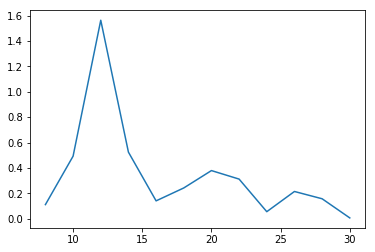

In [55]:
plt.plot(np.arange(8,31,2), bad_psd[0,0,:])

In [56]:
# computing grand averages
good_psd_avg = np.mean(good_psd, axis=0)
bad_psd_avg = np.mean(bad_psd, axis=0)

0


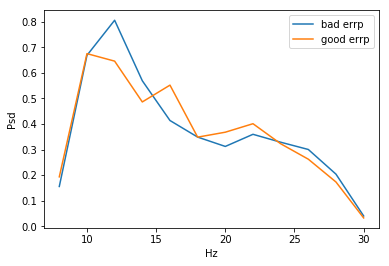

1


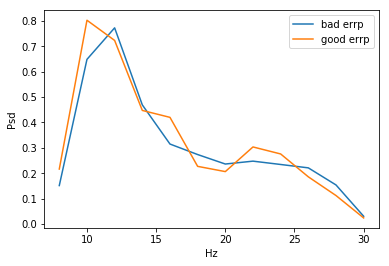

2


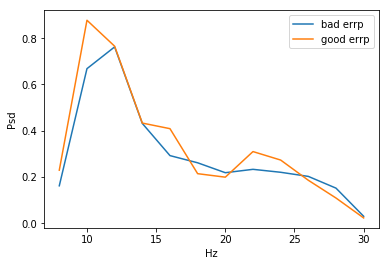

3


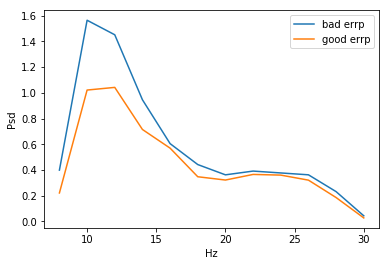

4


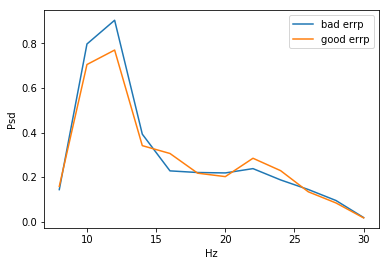

5


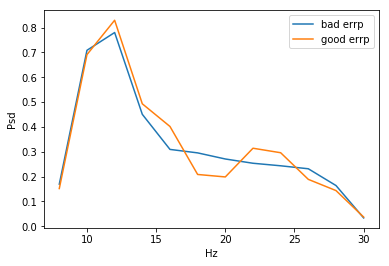

6


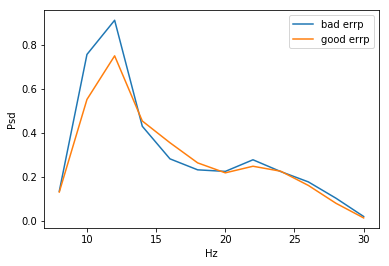

7


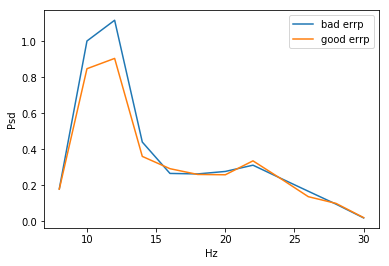

8


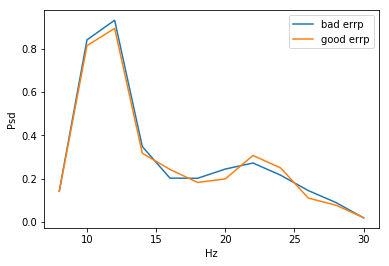

9


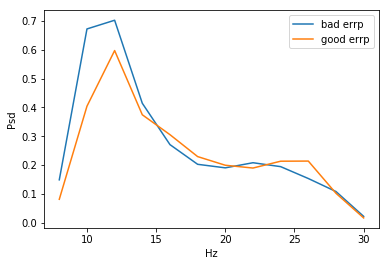

10


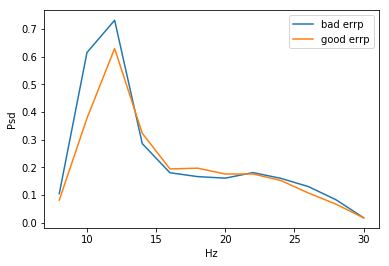

11


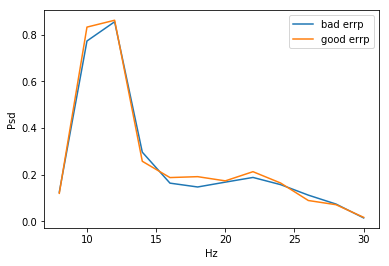

12


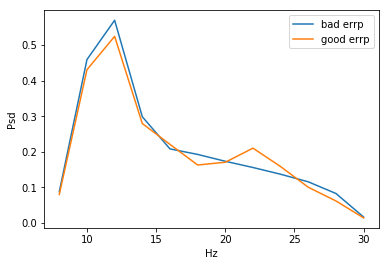

13


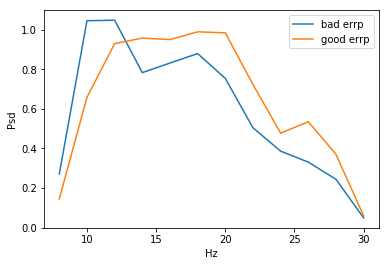

14


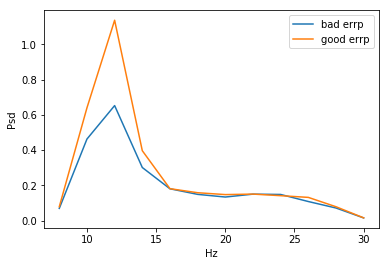

15


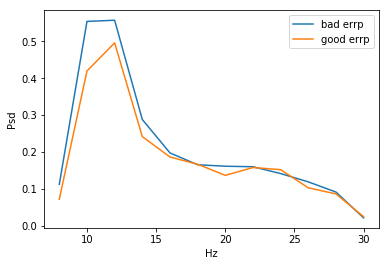

16


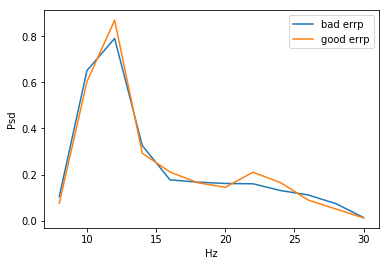

17


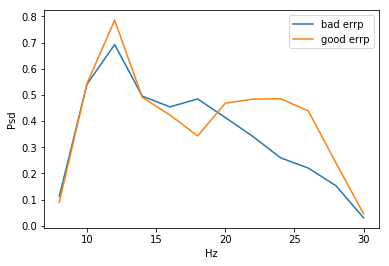

18


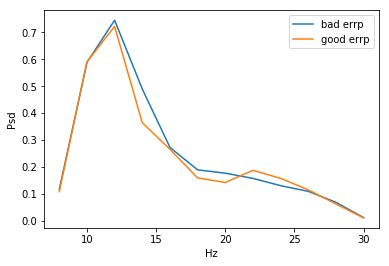

19


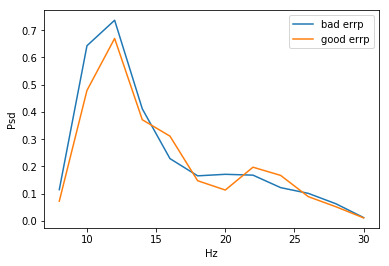

20


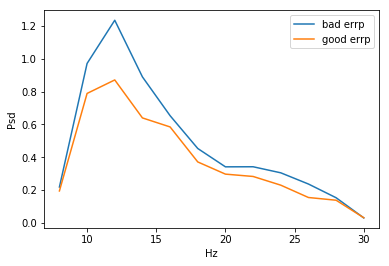

21


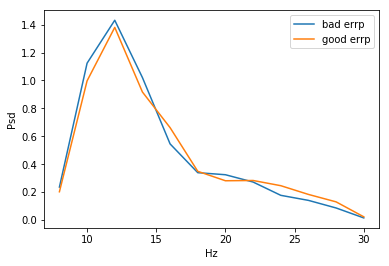

22


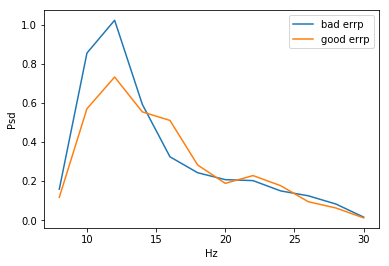

23


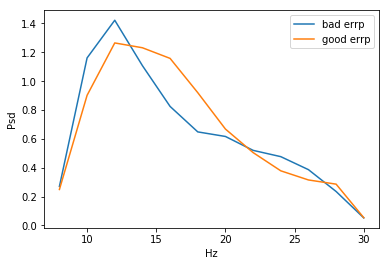

24


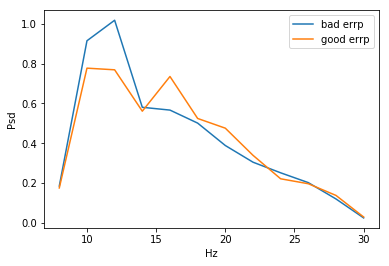

25


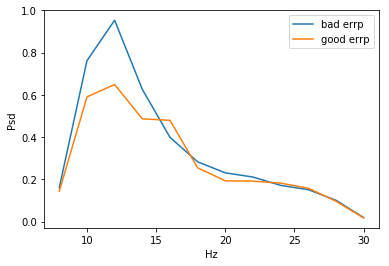

26


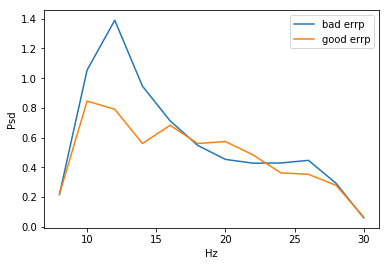

27


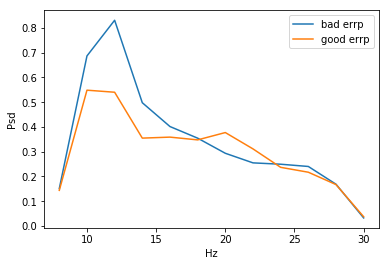

28


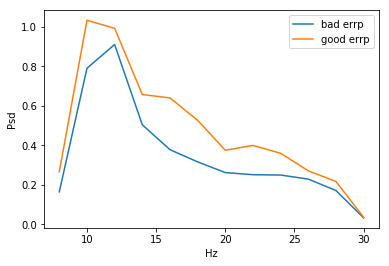

29


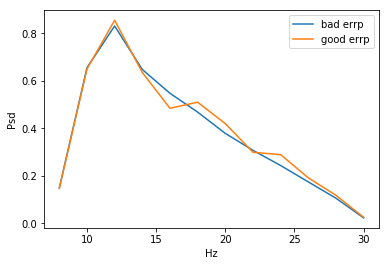

30


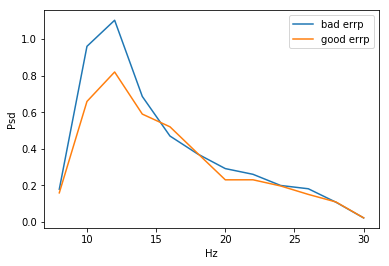

In [57]:
# bad (blue) vs good (orange) plots 

for ch in range(good_psd_avg.shape[0]):
    print(ch)
    plt.plot(np.arange(8,31,2), bad_psd_avg[ch,:], label='bad errp')
    plt.plot(np.arange(8,31,2), good_psd_avg[ch,:], label='good errp')
    plt.xlabel('Hz')
    plt.ylabel('Psd')
    plt.legend()
    plt.show()

In [172]:
#######################################################################################################################################

In [173]:
all_Data = np.concatenate((good_errp, bad_errp), axis=0)

y_g = np.ones((len(good_errp),),dtype=int)
y_b = np.zeros((len(bad_errp),),dtype=int)
y = np.concatenate((y_g, y_b), axis=0)

all_Data.shape, y.shape

((153, 31, 250), (153,))

In [431]:
import linear

In [174]:
import linear
import sklearn
from sklearn import preprocessing

# RidgeCV - time features

In [404]:
from sklearn.model_selection import train_test_split
# train test slipt
X_train, X_test, y_train, y_test = train_test_split(all_Data, y, test_size=0.25, random_state=42)

print('train:', X_train.shape)
print('test:', X_test.shape)



train: (114, 31, 250)
test: (39, 31, 250)


In [405]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0])

In [406]:
X_train_2d = np.reshape(X_train,(X_train.shape[0],X_train.shape[1]*X_train.shape[2]))
X_test_2d = np.reshape(X_test,(X_test.shape[0],X_test.shape[1]*X_test.shape[2]))

In [407]:
# Standardize features to mean 0 and unit variance
scaler = preprocessing.StandardScaler()

scaler.fit(X_train_2d)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [408]:
clsfr_all = sklearn.linear_model.RidgeCV(store_cv_values=True)

In [409]:
clsfr_all.fit(scaler.transform(X_train_2d),y_train)

RidgeCV(alphas=array([ 0.1,  1. , 10. ]), cv=None, fit_intercept=True,
    gcv_mode=None, normalize=False, scoring=None, store_cv_values=True)

In [410]:
print("MSSE=%g"%np.mean(clsfr_all.cv_values_))

MSSE=0.153031


In [411]:
# Test

pred_time = clsfr_all.predict(scaler.transform(X_test_2d))

In [412]:
print('Test             true value                 pred')
for i, p in enumerate(pred_time):
    print('sample',i+1,':              ',y_test[i],'        ', p)

Test             true value                 pred
sample 1 :               0          0.21189842703490624
sample 2 :               0          0.3908772318656024
sample 3 :               0          -0.079922080282264
sample 4 :               0          0.39968624998246727
sample 5 :               0          -0.07590667948560634
sample 6 :               0          -0.01621024784089206
sample 7 :               0          0.4946907231622142
sample 8 :               0          0.18294444531567713
sample 9 :               1          0.39711432967442245
sample 10 :               1          -0.282857328197207
sample 11 :               1          -0.08939057499531855
sample 12 :               1          0.13522681038026751
sample 13 :               1          0.06036509536269273
sample 14 :               0          0.06274047574027057
sample 15 :               0          0.07390979303568991
sample 16 :               0          0.030656346285951278
sample 17 :               0          0.053260470

# RidgeCV - power spectral density

In [413]:
f, psd = welch(all_Data,
            fs= fs  ,           # sample rate
            window='hanning',     # apply a Hanning window before taking the DFT
            nperseg= 125)   


In [414]:
len(f)

63

In [415]:
psd.shape

(153, 31, 63)

In [416]:
f_8 = f > 7

In [417]:
f_30 =f < 31

In [418]:
f_8_30 = f_8 & f_30

In [419]:
psd = psd[:,:,f_8_30]

In [420]:
X_train, X_test, y_train, y_test = train_test_split(psd, y, test_size=0.25, random_state=42)

print('train:', X_train.shape)
print('test:', X_test.shape)



train: (114, 31, 12)
test: (39, 31, 12)


In [421]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0])

In [422]:
X_train_2d = np.reshape(X_train,(X_train.shape[0],X_train.shape[1]*X_train.shape[2]))
X_test_2d = np.reshape(X_test,(X_test.shape[0],X_test.shape[1]*X_test.shape[2]))

In [423]:
# Standardize features to mean 0 and unit variance
scaler = preprocessing.StandardScaler()

scaler.fit(X_train_2d)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [424]:
clsfr_all = sklearn.linear_model.RidgeCV(store_cv_values=True)

In [425]:
clsfr_all.fit(scaler.transform(X_train_2d),y_train)

RidgeCV(alphas=array([ 0.1,  1. , 10. ]), cv=None, fit_intercept=True,
    gcv_mode=None, normalize=False, scoring=None, store_cv_values=True)

In [426]:
print("MSSE=%g"%np.mean(clsfr_all.cv_values_))

MSSE=0.292141


In [427]:
# Test

pred_freq = clsfr_all.predict(scaler.transform(X_test_2d))

In [428]:
print('Test             true value                 pred')
for i, p in enumerate(pred_freq):
    print('sample',i+1,':              ',y_test[i],'        ', p)

Test             true value                 pred
sample 1 :               0          -0.03753463476005883
sample 2 :               0          0.19917551998909988
sample 3 :               0          0.5227915528880467
sample 4 :               0          -0.2737021781026718
sample 5 :               0          0.4540073720300376
sample 6 :               0          1.1867949327481253
sample 7 :               0          0.2797845404564422
sample 8 :               0          0.1115475862213757
sample 9 :               1          0.36527947979894415
sample 10 :               1          0.679262223508261
sample 11 :               1          0.406270696179867
sample 12 :               1          0.05200423273272048
sample 13 :               1          0.20193601436013217
sample 14 :               0          -0.09046106450360228
sample 15 :               0          -0.1996273899468431
sample 16 :               0          0.21828916355110323
sample 17 :               0          0.0187076358494735

# Comparison of the two classifiers

In [429]:
from sklearn import metrics

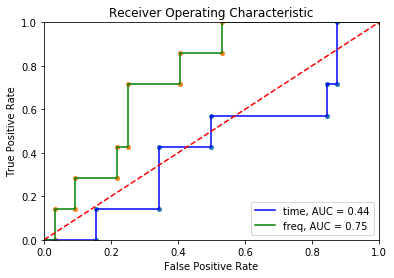

Figure 6: Plot of the ROC curve for the classifiers above along with random guessing classifier represented by the red dashed line.


In [430]:

FP1, TP1, thresh1 = metrics.roc_curve(y_test, pred_time)
FP2, TP2, thresh2 = metrics.roc_curve(y_test, pred_freq)

roc_auc1 = metrics.auc(FP1, TP1)
roc_auc2 = metrics.auc(FP2, TP2)

plt.title('Receiver Operating Characteristic')
plt.plot(FP1, TP1, 'b', label = 'time, AUC = %0.2f' % roc_auc1)
plt.scatter(FP1,TP1,15)
plt.plot(FP2, TP2, 'g', label = 'freq, AUC = %0.2f' % roc_auc2)
plt.scatter(FP2,TP2,15)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
print('Figure 6: Plot of the ROC curve for the classifiers above along with random guessing classifier represented by the red dashed line.')


In [ ]:
threshold = 0.45619815088221327